In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

In [2]:
import librosa as lib
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy as sp
from sklearn import preprocessing
%matplotlib notebook

## Ejercicio 1.
1. Seleccionar un audio a gusto, en formato wav preferiblemente.
1. Analizar dicho audio mediante python de manera visual. 
1. Encontrar analiticamente valores maximos, minimos y medio.

Hola robin. 


In [3]:
## Cargar audio.
sig,fs= lib.load('mivozsinsilencios.wav', sr = 44100)
print(sig)

[-0.03695679 -0.0406189  -0.04394531 ... -0.01715088 -0.01693726
 -0.0168457 ]


## Ejercicio 2.
1. Normalizar audio mediante las siguientes tecnicas:
    1. Max Normalization.
    1. MinMax Normalization.
    1. RMS Normalization.
    1. Z-score Normalization.
    
> Para cada caso visualizar y analizar la señal resultante.

La idea principal detrás de la normalización / estandarización es siempre la misma. Las variables que se miden a diferentes escalas no contribuyen por igual a la función de ajuste y aprendizaje de los modelos y podrían terminar creando un sesgo. Por lo tanto, para lidiar con este problema potencial, la normalización por características, generalmente se usa antes del ajuste de los modelo.

### MinMax Normalization.

Este tipo de normalización consiste en la razon entre la señal menos el valor minimo de esta y la diferencia entre los valores maximos y minimos, esto representados mediante la siguiente ecuación:
\begin{equation}
    y = \frac{x-min}{max-min}
\end{equation}
Donde:
\begin{itemize}
\item x   $................$ Señal de audio.
\item min $................$ Valor minimo de la señal.
\item max $................$ Valor maximo de la señal.
\item y   $................$ Resultado de la señal luego de aplicar la normalización de MinMax.
\end{itemize}

In [4]:
### MIn-max Normalization.
min_max_norm = (sig - sig.min(axis=0)) / (sig.max(axis=0) - sig.min(axis=0))
print(min_max_norm)

[0.46127874 0.45615008 0.4514916  ... 0.48901615 0.48931533 0.48944354]


<IPython.core.display.Javascript object>


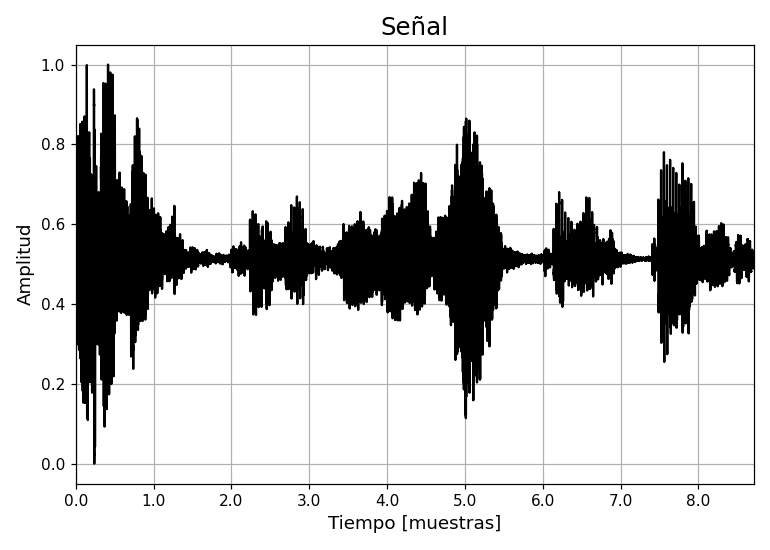

[Text(0, 0, '0.0'),
 Text(10000, 0, '1.0'),
 Text(20000, 0, '2.0'),
 Text(30000, 0, '3.0'),
 Text(40000, 0, '4.0'),
 Text(50000, 0, '5.0'),
 Text(60000, 0, '6.0'),
 Text(70000, 0, '7.0'),
 Text(80000, 0, '8.0')]

In [5]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5),tight_layout=True)

ax.plot(min_max_norm,c='k')
ax.set_xlabel('Tiempo [muestras]',fontsize=12)
ax.set_ylabel('Amplitud',fontsize=12)
ax.set_title('Señal',fontsize=16)
ax.grid(True)
ax.set_xlim([-1,len(sig)])
ticks=[i for i in range(0,len(min_max_norm),int(1e4))]
ticks1=[i/1e4 for i in range(0,len(min_max_norm),int(1e4))]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks1)

### Normalizacion por Z-score.

Es una fórmula que permite la estandarización de una distribución.  Una distribución hace referencia a un conjunto de datos.Esta fórmula se calcula restando a la señal, la media de la distribución y dividiendo el resultado por la desviación típica (la distancia que tiene dicho dato respecto de la media).

\begin{equation}
    y = \frac{x-\mu}{\sigma}
\end{equation}
Donde:
\begin{itemize}
\item x   $................$ Señal de audio.
\item $\mu$ $................$ Media de la distribucion.
\item $\sigma$ $................$ Desviación Típica.
\end{itemize}


In [13]:
### Zscore
mean = np.mean(np.abs(sig))
standard_deviation = np.std(np.abs(sig))
distance_from_mean = np.abs(sig - mean)
not_outlier = distance_from_mean < standard_deviation
no_outliers = sig[not_outlier]
print(no_outliers)
print(mean)

[-0.00363159  0.0072937   0.01901245 ... -0.00723267 -0.00842285
 -0.00909424]
0.027753321


<IPython.core.display.Javascript object>


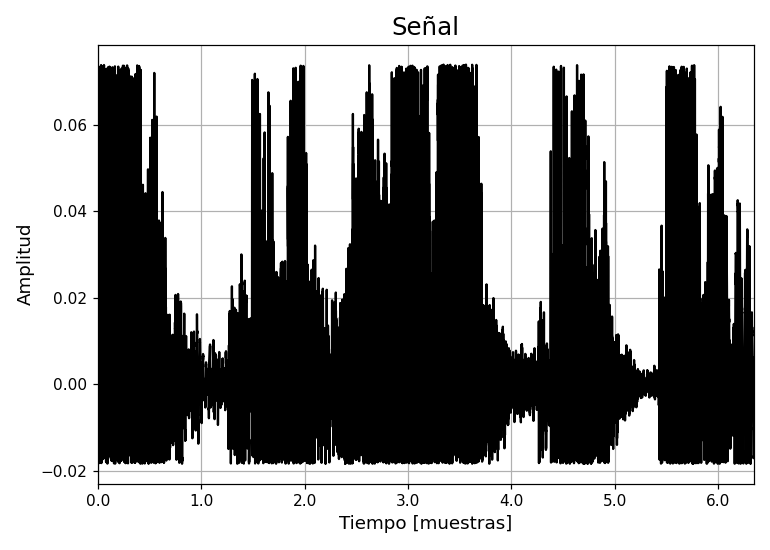

[Text(0, 0, '0.0'),
 Text(10000, 0, '1.0'),
 Text(20000, 0, '2.0'),
 Text(30000, 0, '3.0'),
 Text(40000, 0, '4.0'),
 Text(50000, 0, '5.0'),
 Text(60000, 0, '6.0')]

In [12]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5),tight_layout=True)

ax.plot(no_outliers,c='k')
ax.set_xlabel('Tiempo [muestras]',fontsize=12)
ax.set_ylabel('Amplitud',fontsize=12)
ax.set_title('Señal',fontsize=16)
ax.grid(True)
ax.set_xlim([-1,len(no_outliers)])
ticks=[i for i in range(0,len(no_outliers),int(1e4))]
ticks1=[i/1e4 for i in range(0,len(no_outliers),int(1e4))]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks1)

### Normalizacion por RMS.

En general, hay dos tipos principales de normalización de audio:
\begin{itemize}
\item Normalización de picos que ajusta la grabación en función de su nivel de señal más alto.
\item Normalización de la sonoridad que ajusta la grabación en función de su sonoridad percibida.
\end{itemize}
La normalización RMS cae bajo este último, donde el nivel de sonoridad percibida se determina utilizando la raíz cuadrada media de la señal. El resultado luego se usa para calcular el valor de ganancia usado en la normalización. Dado que el valor de ganancia es constante y se aplica a toda la grabación, la normalización no afecta la relación señal / ruido y la dinámica relativa . El enfoque de la normalización RMS se puede resumir en la siguiente fórmula matemática:

\begin{equation}
    y[n] = \sqrt{\left(\frac{N-10(\frac{r}{20})}{\sum_{i=0}^{N-1}x^{2}[i]}\right)}\cdot x[n]
\end{equation}
Donde:
\begin{itemize}
\item $x[n]$ $................$ Señal de audio.
\item $y[n]$ $................$ Señal normalizada.
\item N   $................$ Largo de la señal.
\item $r$ $................$ Nivel RMS de entrada en dB.
\end{itemize}


In [8]:
### RMS Normalizacion.
rms_level =0 
r = 10**(rms_level / 10.0)
a = np.sqrt( (len(sig) * r**2) / np.sum(sig**2) )
y = sig*a
print(y)

[-0.8001223  -0.87940776 -0.9514254  ... -0.3713202  -0.3666952
 -0.36471307]


<IPython.core.display.Javascript object>


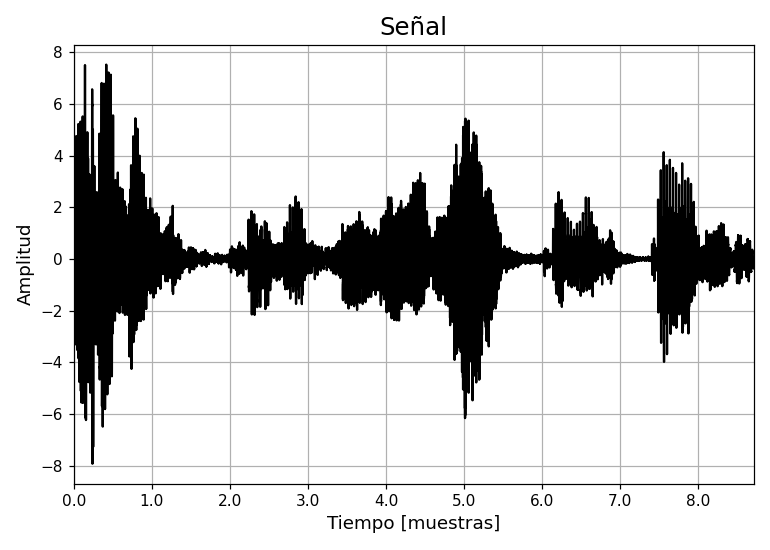

[Text(0, 0, '0.0'),
 Text(10000, 0, '1.0'),
 Text(20000, 0, '2.0'),
 Text(30000, 0, '3.0'),
 Text(40000, 0, '4.0'),
 Text(50000, 0, '5.0'),
 Text(60000, 0, '6.0'),
 Text(70000, 0, '7.0'),
 Text(80000, 0, '8.0')]

In [9]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5),tight_layout=True)

ax.plot(y,c='k')
ax.set_xlabel('Tiempo [muestras]',fontsize=12)
ax.set_ylabel('Amplitud',fontsize=12)
ax.set_title('Señal',fontsize=16)
ax.grid(True)
ax.set_xlim([-1,len(y)])
ticks=[i for i in range(0,len(y),int(1e4))]
ticks1=[i/1e4 for i in range(0,len(y),int(1e4))]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks1)

## Ejercicio 3 
1. Comparar señal original con señales resultantes. 
1. Discutir.
1. Concluir.